<a href="https://colab.research.google.com/github/yangchangnaihoby/AI_7th/blob/master/Day_044_NLP_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install konlpy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.4 MB/s 
     |████████████████████████████████| 453 kB 47.8 MB/s 


In [56]:
data_ori = pd.read_csv('ChatbotData.csv')
mask = data_ori[data_ori['label'] == 0].index
data = data_ori.drop(mask)
data.loc[data['label'] == 1, 'label'] = 0
data.loc[data['label'] == 2, 'label'] = 1

In [57]:
data.head()

,Q,A,label
5290,1000일 만난 여자친구와 이별,더 오래 만날 사람 만날 거예요.,0
5291,10년 연애. 헤어졌습니다.,더 공허함이 크시겠네요.,0
5292,10년 연애사 되돌아보니 다 부질없네,더 좋은 사람 만나실 거예요.,0
5293,10년 연예의끝,더 마음이 허하겠어요.,0
5294,10년만나다 헤어지네,충분히 슬퍼하고 충분히 아파하다가 이겨내세요.,0


In [58]:
data['A'].nunique(), data['label'].nunique()

(5557, 2)

In [59]:
len(data)

6533

In [60]:
data.drop_duplicates(subset = ['A'], inplace = True)

In [61]:
len(data)

5557

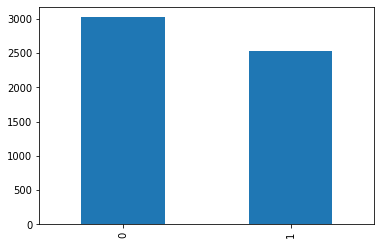

In [62]:
data['label'].value_counts().plot(kind = 'bar')

In [63]:
print(data.groupby('label').size().reset_index(name = 'count'))

   label  count
0      0   3023
1      1   2534


In [64]:
print(data.isnull().values.any())

False


In [65]:
data['A'] = data['A'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
data[ : 5]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,Q,A,label
5290,1000일 만난 여자친구와 이별,더 오래 만날 사람 만날 거예요,0
5291,10년 연애. 헤어졌습니다.,더 공허함이 크시겠네요,0
5292,10년 연애사 되돌아보니 다 부질없네,더 좋은 사람 만나실 거예요,0
5293,10년 연예의끝,더 마음이 허하겠어요,0
5294,10년만나다 헤어지네,충분히 슬퍼하고 충분히 아파하다가 이겨내세요,0


In [66]:
data['A'] = data['A'].str.replace('^ +', "")
data['A'].replace('', np.nan, inplace = True)
print(data.isnull().sum())

Q        0
A        0
label    0
dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [67]:
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍',
             '과', '도', '를', '으로', '자', '에', '와', '한', '하다']

In [68]:
okt = Okt()
okt.morphs('와 이런 것도 영화라고 차라리 뮤직비디오를 만드는 게 나을 뻔', stem = True)

['오다', '이렇다', '것', '도', '영화', '라고', '차라리', '뮤직비디오', '를', '만들다', '게', '나다', '뻔']

In [69]:
X_train = []

for sentence in tqdm(data['A']) :
    tokenized_sentence = okt.morphs(sentence, stem = True)
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords]
    X_train.append(stopwords_removed_sentence)

100%|██████████| 5557/5557 [00:09<00:00, 596.21it/s]


In [70]:
print(X_train[ : 3])

[['더', '오래', '만날', '사람', '만날', '거', '예요'], ['더', '공허하다', '크다'], ['더', '좋다', '사람', '만나다', '거', '예요']]


In [71]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [72]:
print(tokenizer.word_index)

{'을': 1, '거': 2, '보다': 3, '있다': 4, '예요': 5, '좋다': 6, '요': 7, '사랑': 8, '해보다': 9, '않다': 10, '생각': 11, '마음': 12, '사람': 13, '것': 14, '없다': 15, '수': 16, '같다': 17, '더': 18, '되다': 19, '힘들다': 20, '그렇다': 21, '바라다': 22, '시간': 23, '아니다': 24, '말다': 25, '연락': 26, '말': 27, '게': 28, '이다': 29, '자다': 30, '이별': 31, '많이': 32, '건': 33, '당신': 34, '이에요': 35, '모르다': 36, '자신': 37, '좋아하다': 38, '그': 39, '어떻다': 40, '가보다': 41, '해주다': 42, '일': 43, '때': 44, '안': 45, '수도': 46, '죠': 47, '만나다': 48, '에게': 49, '정리': 50, '필요하다': 51, '많다': 52, '저': 53, '만': 54, '적': 55, '돼다': 56, '못': 57, '하고': 58, '오다': 59, '후회': 60, '중요하다': 61, '괜찮다': 62, '해': 63, '서로': 64, '이제': 65, '잊다': 66, '인': 67, '걸': 68, '힘드다': 69, '에서': 70, '아프다': 71, '다른': 72, '쉬다': 73, '만큼': 74, '나': 75, '물어보다': 76, '시작': 77, '일이': 78, '로': 79, '제': 80, '감정': 81, '싶다': 82, '받다': 83, '먼저': 84, '네': 85, '표현': 86, '기억': 87, '미련': 88, '정말': 89, '기다리다': 90, '행복하다': 91, '지금': 92, '전': 93, '충분하다': 94, '연애': 95, '알다': 96, '헤어지다': 97, '가다': 98, '이네': 99, '대화': 100, '다시

In [73]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items() :
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold) :
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수 : %s' % (threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율 :", (rare_cnt / total_cnt) * 100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율 :", (rare_freq / total_freq) * 100)

단어 집합(vocabulary)의 크기 : 2559
등장 빈도가 2번 이하인 희귀 단어의 수 : 1403
단어 집합에서 희귀 단어의 비율 : 54.826103946854246
전체 등장 빈도에서 희귀 단어 등장 빈도 비율 : 6.551383760465031


In [74]:
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :', vocab_size)

단어 집합의 크기 : 1157


In [75]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)

In [76]:
print(X_train[ : 3])

[[18, 302, 152, 13, 152, 2, 5], [18, 598, 117], [18, 6, 13, 48, 2, 5]]


In [77]:
y_train = np.array(data['label'])

In [78]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

In [79]:
X_train = np.delete(X_train, drop_train, axis = 0)
y_train = np.delete(y_train, drop_train, axis = 0)
print(len(X_train))
print(len(y_train))

5518
5518


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


문장의 최대 길이 : 25
문장의 평균 길이 : 4.63229430953244


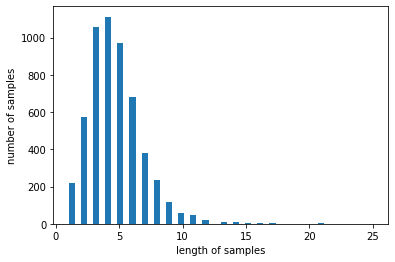

In [80]:
print('문장의 최대 길이 :', max(len(review) for review in X_train))
print('문장의 평균 길이 :', sum(map(len, X_train)) / len(X_train))
plt.hist([len(review) for review in X_train], bins = 50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [81]:
def below_threshold_len(max_len, nested_list) :
  count = 0
  for sentence in nested_list :
    if(len(sentence) <= max_len) :
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s' % (max_len, (count / len(nested_list)) * 100))

In [82]:
max_len = 10
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 10 이하인 샘플의 비율: 97.98840159478071


In [83]:
X_train = pad_sequences(X_train, maxlen = max_len)

In [84]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(1, activation = 'sigmoid'))

es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 4)
mc = ModelCheckpoint('best_model.h5', monitor = 'val_acc', mode = 'max', verbose = 1, save_best_only = True)

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
history = model.fit(X_train, y_train, epochs = 15, callbacks = [es, mc], batch_size = 64, validation_split = 0.2)

Epoch 1/15
69/69 [==============================] - ETA: 0s - loss: 0.5720 - acc: 0.7012
Epoch 1: val_acc improved from -inf to 0.39130, saving model to best_model.h5
69/69 [==============================] - 7s 64ms/step - loss: 0.5720 - acc: 0.7012 - val_loss: 0.9247 - val_acc: 0.3913
Epoch 2/15
68/69 [============================>.] - ETA: 0s - loss: 0.4446 - acc: 0.8008
Epoch 2: val_acc improved from 0.39130 to 0.55616, saving model to best_model.h5
69/69 [==============================] - 2s 30ms/step - loss: 0.4450 - acc: 0.8002 - val_loss: 0.8634 - val_acc: 0.5562
Epoch 3/15
69/69 [==============================] - ETA: 0s - loss: 0.3901 - acc: 0.8237
Epoch 3: val_acc did not improve from 0.55616
69/69 [==============================] - 2s 30ms/step - loss: 0.3901 - acc: 0.8237 - val_loss: 1.1956 - val_acc: 0.4484
Epoch 4/15
69/69 [==============================] - ETA: 0s - loss: 0.3651 - acc: 0.8357
Epoch 4: val_acc did not improve from 0.55616
69/69 [==========================

In [87]:
loaded_model = load_model('best_model.h5')

In [88]:
def sentiment_predict(new_sentence) :
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '', new_sentence)
  new_sentence = okt.morphs(new_sentence, stem = True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  if(score > 0.5) :
    print("{:.2f}% 확률로 긍정입니다.\n".format(score * 100))
  else :
    print("{:.2f}% 확률로 부정입니다.\n".format((1 - score) * 100))

In [89]:
sentiment_predict('날씨가 참 좋네요!')

51.02% 확률로 긍정입니다.



In [90]:
sentiment_predict('제발 일 좀 하세요')

64.47% 확률로 부정입니다.



In [94]:
sentiment_predict('제발 그만해')

63.04% 확률로 부정입니다.



In [95]:
sentiment_predict('이러다 다 죽어~~~')

50.60% 확률로 부정입니다.



In [96]:
sentiment_predict('당신은 정말 아름답습니다')

61.30% 확률로 부정입니다.



In [97]:
sentiment_predict('당신은 정말 가치가 없군요')

51.25% 확률로 긍정입니다.



In [98]:
sentiment_predict('헤어지는게 좋을 것 같아요')

78.34% 확률로 부정입니다.



In [100]:
sentiment_predict('더 오래 만날 사람 만날 거예요.')

55.47% 확률로 부정입니다.



In [101]:
sentiment_predict('헤어지면 안 돼요!!!')

89.70% 확률로 부정입니다.

